In [6]:
import pandas as pd 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
suicide_us = os.path.join("..", "data", "rawdata", "master.csv")
suicide_us_df = pd.read_csv(suicide_us)
suicide_us_df.head()
# suicide_us_df.info()         # 27820 entries, 12 columns, data types appropriate

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
US_data = suicide_us_df [suicide_us_df['country'] == 'United States']
US_data.head(0)                      # 372 rows × 12 columns

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
26853,United States,1985,female,35-54 years,2105,27763000,7.58,United States1985,0.841,"4,346,734,000,000",19693,Silent
26854,United States,1985,female,55-74 years,1568,21366000,7.34,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26856,United States,1985,female,25-34 years,1242,21041000,5.90,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26857,United States,1985,female,15-24 years,854,19589000,4.36,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [12]:
US_data_male = US_data[US_data['sex'] == "male"]
US_data_female = US_data[US_data['sex'] == "female"]

US_data_male_1985 = US_data_male[US_data_male['year'] == 1985]
US_data_male_2015 = US_data_male[US_data_male['year'] == 2015]

US_data_female_1985 = US_data_female[US_data_female['year'] == 1985]
US_data_female_2015 = US_data_female[US_data_female['year'] == 2015]
US_data_male_1985

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
26858,United States,1985,male,5-14 years,205,17370000,1.18,United States1985,0.841,"4,346,734,000,000",19693,Generation X


{'5-14 years', '25-34 years', '75+ years', '35-54 years', '15-24 years', '55-74 years'}
[26848    2177
26849    5302
26850    5134
26851    6053
26852    4267
26858     205
Name: suicides_no, dtype: int64]


ValueError: 'explode' must be of length 'x'

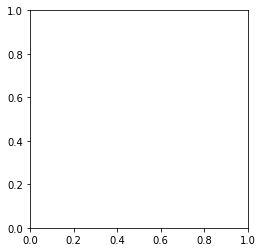

In [15]:
# pie plots to compare male suicides 30yrs apart, and male:female rates.
labels = {"5-14 years","15-24 years","25-34 years","35-54 years","55-74 years", "75+ years"}
print(labels)
sizes = [US_data_male_1985.loc[:, "suicides_no"]]
print(sizes)
explode = (0, 0.2, 0, 0, 0, 0)
labels = [US_data_male_1985.loc[:, "age"]]
# colors = ["yellow","green","lightblue","orange","red","purple","pink",
#           "yellowgreen","lightskyblue","lightcoral"]
colors = ["red", "orange", "lightcoral", "lightskyblue", "purple", "pink"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("auto")
# plt.savefig("../Images/PyPies.png")
plt.show()

In [ ]:
# len(who_df.groupby(["country"]).groups)        # 101 countries?
# who_df.groupby(["country"]).groups  # 264 lines / country w breakout by row
# len(who_df)             
#27820 rows, 264 entries/country; 12 age+gender rows/yr x 10yrs (2 missing)

# countries = []    
# for i in len(who_df):
#     if who_df.loc[i,"coutry"] not in countries:
#         countries.append(who_df.loc[i,country])
# print(*countries)

# who_group = pd.DataFrame(who_df.groupby('country', as_index=False).first())
# who_group.head(10)